Terry Hood Jupyter Notebook 

## Multi-Layer Perceptron (MLP) model

Step 1: Install Required Libraries

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss

Step 2: Prepare Your Data

In [22]:
# Load the dataset
clean_df = pd.read_csv('../clean_df.csv')
clean_df.head(5)

,EDUC,MARSTAT,SERVICES,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,PSYPROB,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,3,1,7,7,6,1,0,2,2,1,...,0,0,0,0,0,0,9,4,0,1
1,3,4,7,8,1,1,0,2,2,1,...,0,0,0,0,0,1,9,4,0,3
2,3,4,7,7,3,1,0,1,2,2,...,0,0,0,0,0,0,9,4,0,2
3,5,1,7,4,7,0,0,1,2,2,...,0,0,0,0,0,0,9,4,0,1
4,3,4,7,3,7,1,1,4,2,1,...,0,0,0,0,0,0,9,4,0,3


In [23]:
# Set the features variable 
X = clean_df.drop(columns='REASON')
# Set the target variable
y = clean_df["REASON"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 3: Define Define and Train the MLP Model

In [26]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)


In [27]:
# New history to store the loss and accuracy
# Manually track the loss and accuracy
history = {'loss': [], 'accuracy': []}
num_epochs = 3

for epoch in range(num_epochs):
    mlp.fit(X_train, y_train)
    
    # Predict on the training data
    train_predictions = mlp.predict(X_train)
    train_probabilities = mlp.predict_proba(X_train)
    
    # Calculate accuracy and log loss
    accuracy = accuracy_score(y_train, train_predictions)
    loss = log_loss(y_train, train_probabilities)
    
    # Store the metrics
    history['loss'].append(loss)
    history['accuracy'].append(accuracy)
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Convert history to a DataFrame for further analysis or plotting
history_df = pd.DataFrame(history)
print(history_df)

Epoch 1/3, Loss: 0.3719, Accuracy: 0.8234
Epoch 2/3, Loss: 0.3719, Accuracy: 0.8234
Epoch 3/3, Loss: 0.3719, Accuracy: 0.8234
       loss  accuracy
0  0.371928  0.823385
1  0.371928  0.823385
2  0.371928  0.823385


Predict and Evaluate the MLP Model

In [28]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = mlp.predict(X_test)
print(f'Accuracy: {np.mean(y_pred == y_test):.2f}')
print(classification_report(y_test, y_pred))



Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.78      0.71      0.75    708990
           1       0.84      0.88      0.86   1223451

    accuracy                           0.82   1932441
   macro avg       0.81      0.80      0.80   1932441
weighted avg       0.82      0.82      0.82   1932441



In [29]:
# Check to see if data is balanced
clean_df["REASON"].value_counts()

1    4078702
0    2362767
Name: REASON, dtype: int64

In [30]:
# Save the model
import joblib
joblib.dump(mlp, 'mlp_model_vsc.pkl')

['mlp_model_vsc.pkl']

       loss  accuracy
0  0.371928  0.823385
1  0.371928  0.823385
2  0.371928  0.823385


<Axes: >

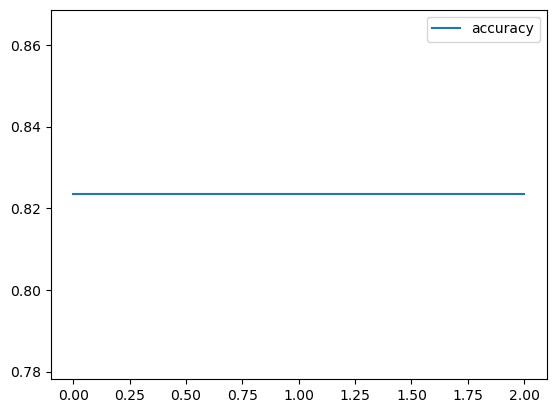

In [31]:
# # Access the history dictionary
# history_dict = history.history

# # Create a DataFrame from the history dictionary
# history_df = pd.DataFrame(history_dict)

# Display the first few rows of the DataFrame
print(history_df.head(10))

# Assuming "accuracy" is a key in your `cleaned_df` DataFrame, plot the accuracy
history_df.plot(y="accuracy")

<Axes: >

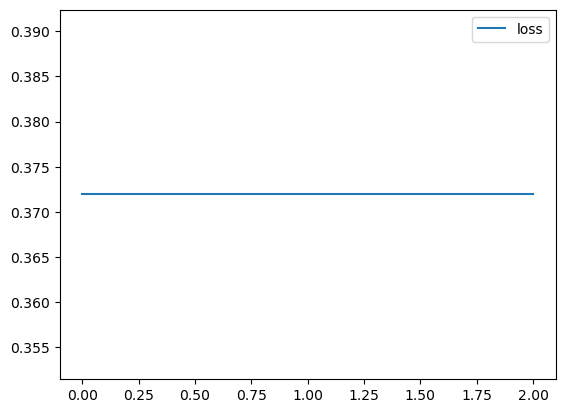

In [32]:
history_df.plot(y="loss")

## TensorFlow / Keras model

TensorFlow/Keras:

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set input nodes to the number of features
input_nodes = len(X.columns)
display(input_nodes)

68

In [34]:
# Define the MLP model
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')  # Adjust the number of neurons to match the number of classes in your dataset
])

c:\Users\tdhdp\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Check the structure of the Sequential model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │         6,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,103 (47.28 KB)

 Trainable params: 12,103 (47.28 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Epoch 1/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 188s 2ms/step - accuracy: 0.7787 - loss: 0.4458 - val_accuracy: 0.8020 - val_loss: 0.4066
Epoch 2/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 185s 2ms/step - accuracy: 0.8042 - loss: 0.4040 - val_accuracy: 0.8077 - val_loss: 0.3974
Epoch 3/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 187s 2ms/step - accuracy: 0.8089 - loss: 0.3967 - val_accuracy: 0.8097 - val_loss: 0.3948
Epoch 4/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 191s 2ms/step - accuracy: 0.8107 - loss: 0.3930 - val_accuracy: 0.8112 - val_loss: 0.3921
Epoch 5/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 189s 2ms/step - accuracy: 0.8125 - loss: 0.3907 - val_accuracy: 0.8126 - val_loss: 0.3893
Epoch 6/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 188s 2ms/step - accuracy: 0.8135 - loss: 0.3890 - val_accuracy: 0.8130 - val_loss: 0.3899
Epoch 7/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 183s 2ms/step - accuracy: 0.8140 - loss: 0.3882 - val_accuracy: 0.8136 - val_loss: 0.3891
Epoch 8/20
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 18

In [38]:
# Save the model
model.save('mlp_model.keras')


   accuracy      loss  val_accuracy  val_loss
0  0.792055  0.423443      0.802034  0.406615
1  0.805449  0.401763      0.807710  0.397361
2  0.809199  0.395788      0.809682  0.394769
3  0.811107  0.392711      0.811206  0.392142
4  0.812478  0.390720      0.812575  0.389268
5  0.813299  0.389297      0.812994  0.389881
6  0.814122  0.388309      0.813633  0.389060
7  0.814455  0.387605      0.813237  0.389461
8  0.814808  0.387091      0.813491  0.389008
9  0.815185  0.386489      0.813693  0.388202


<Axes: >

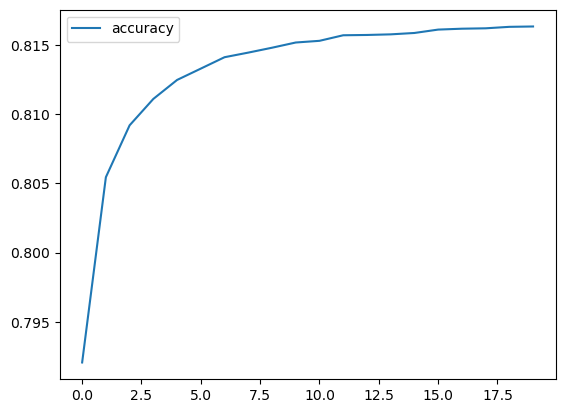

In [39]:
# Access the history dictionary
history_dict = history.history

# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history_dict)

# Display the first few rows of the DataFrame
print(history_df.head(10))

# Assuming "accuracy" is a key in your `cleaned_df` DataFrame, plot the accuracy
history_df.plot(y="accuracy")

<Axes: >

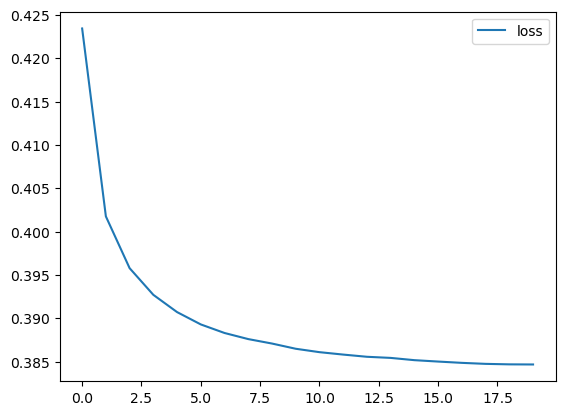

In [40]:
history_df.plot(y="loss")

Predict and Evaluate the TensorFlow/Keras Model

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes):.2f}')

60389/60389 ━━━━━━━━━━━━━━━━━━━━ 199s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.72      0.74    708990
           1       0.84      0.87      0.86   1223451

    accuracy                           0.82   1932441
   macro avg       0.80      0.80      0.80   1932441
weighted avg       0.81      0.82      0.81   1932441

Accuracy: 0.82


This code covers the entire process from data preparation to making predictions on new data for both Scikit-learn and TensorFlow/Keras implementations of an MLP model.

<!-- Step 4: Evaluate and Save the Model
After training, evaluate the model’s performance and save it if necessary. -->